 POSTTEST 5 KB - Supervised Learning

In [113]:
# IMPORT PACKAGE | pandas - numpy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Module | Sklearn | Data Cleaning 
from sklearn.impute import SimpleImputer

# Import Module | Sklearn | Supervised learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Import untuk menghilangkan warning 
import warnings
warnings.filterwarnings('ignore')

In [114]:
# Baca Berkas CSV - Dataset

rating = pd.read_csv("MALratings.csv")
rating.head(5)

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13,404,8.99,12,23 min. per ep.,Spring 2022
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14,533,8.96,22,25 min. per ep.,Fall 2017
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",19,939,8.93,1,1 hr. 50 min.,NaN
3,Gintama.,"Action,Comedy,Sci-Fi",12,735,8.99,12,24 min. per ep.,Winter 2017
4,Koe no Katachi,NaN,15,19,8.96,1,2 hr. 10 min.,NaN


In [115]:
# Menampilkan informasi Dataset

rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           20343 non-null  object 
 1   Genres          10016 non-null  object 
 2   Rank            20343 non-null  object 
 3   Popularity      20343 non-null  int64  
 4   Score           14019 non-null  float64
 5   Episodes        20343 non-null  object 
 6   Episode length  20343 non-null  object 
 7   Release Date    5087 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [116]:
# Mengecek nilai NULL pada Dataset

rating.isna().sum()

Title                 0
Genres            10327
Rank                  0
Popularity            0
Score              6324
Episodes              0
Episode length        0
Release Date      15256
dtype: int64

In [117]:
# Data Cleaning 
# Menyalin Dataset rating | Bahan Data Cleaning

cleaning_rating_before = rating.copy()
clean_rating = rating.copy()

In [118]:
# Mengecek nilai NULL dataset cleaning_rating_before (pacuan untuk cleaning)

cleaning_rating_before.isna().sum()

Title                 0
Genres            10327
Rank                  0
Popularity            0
Score              6324
Episodes              0
Episode length        0
Release Date      15256
dtype: int64

In [119]:
# Mengecek type record dataset cleaning_rating_before (pacuan untuk cleaning)

cleaning_rating_before.dtypes

Title              object
Genres             object
Rank               object
Popularity          int64
Score             float64
Episodes           object
Episode length     object
Release Date       object
dtype: object

In [120]:
# Cleaning dataset yang bernilai NULL dengan "dropna"

clean_rating.dropna(inplace=True)
clean_rating.isna().sum()
# Untuk perbandingan cek "cleaning_rating_before.isna().sum()" diatas

Title             0
Genres            0
Rank              0
Popularity        0
Score             0
Episodes          0
Episode length    0
Release Date      0
dtype: int64

In [121]:
# Mengecek duplikat dataset | Record Release Date

cleaning_rating_before['Release Date'].duplicated().sum()

20107

In [122]:
# Cleaning Dupe dataset | Record Release Date | Dataset "rating_clean"

clean_rating.drop_duplicates(inplace=True)
clean_rating.duplicated().sum()

0

In [123]:
# Data Bersih 

clean_rating.head()

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13,404,8.99,12,23 min. per ep.,Spring 2022
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14,533,8.96,22,25 min. per ep.,Fall 2017
3,Gintama.,"Action,Comedy,Sci-Fi",12,735,8.99,12,24 min. per ep.,Winter 2017
6,Code Geass: Hangyaku no Lelouch,"Action,Drama,Sci-Fi",50,17,8.70,25,24 min. per ep.,Fall 2006
7,Gintama,"Action,Comedy,Sci-Fi",16,127,8.95,201,24 min. per ep.,Spring 2006


In [124]:
# Mengecek banyak isi data bersih

len(clean_rating)

3232

In [125]:
# Melihat deskripsi data bersih

clean_rating.describe()

,Popularity,Score
count,3232.000000,3232.000000
mean,4023.589728,6.944821
std,3575.180725,0.764228
min,1.000000,2.930000
25%,1136.750000,6.440000
50%,2858.500000,6.960000
75%,6046.250000,7.430000
max,13751.000000,9.140000


In [126]:
# Menampilkan preview data bersih

clean_rating.head()

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13,404,8.99,12,23 min. per ep.,Spring 2022
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14,533,8.96,22,25 min. per ep.,Fall 2017
3,Gintama.,"Action,Comedy,Sci-Fi",12,735,8.99,12,24 min. per ep.,Winter 2017
6,Code Geass: Hangyaku no Lelouch,"Action,Drama,Sci-Fi",50,17,8.70,25,24 min. per ep.,Fall 2006
7,Gintama,"Action,Comedy,Sci-Fi",16,127,8.95,201,24 min. per ep.,Spring 2006


In [127]:
# mengecek korelasi data bersih
clean_rating.corr()

,Popularity,Score
Popularity,1.0000,-0.5373
Score,-0.5373,1.0000


In [128]:
# Data Split | SL Classificatioin

data = clean_rating[['Popularity', 'Score']]
label = clean_rating[['Release Date']]

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=1)

In [129]:
# Classification
# K-Nearest Neighbour 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data_train, label_train)

KNeighborsClassifier()

In [130]:
predicting = knn.predict(data_test)

In [131]:
acc = accuracy_score(label_test, predicting)

In [132]:
print("Akurasi algoritma K-Nearest Neighbour: ", {acc})

Akurasi algoritma K-Nearest Neighbour:  {0.0}


In [133]:
# Naive Bayes | GaussianNB

In [134]:
gnb = GaussianNB()
gnb.fit(data_train, label_train)

GaussianNB()

In [135]:
predicting = gnb.predict(data_test)

In [136]:
acc = accuracy_score(label_test, predicting)

In [137]:
print("Akurasi aloritma GaussianNB: ", {acc})

Akurasi aloritma GaussianNB:  {0.0}


In [138]:
# Data Split | SL Regression
data2 = clean_rating[['Popularity']]
label2 = clean_rating[['Score']]

data_train2, data_test2, label_train2, label_test2 = train_test_split(data2, label2, test_size=1)

In [139]:
# Regression
# Linear Regression

reg = LinearRegression()
reg.fit(data_train2,label_train2)

LinearRegression()

In [140]:
predicting2 = reg.predict(data_test2)

In [141]:
print(len(data_test2),
     len(predicting2))

1 1


In [142]:
print(len(data_test2),
     len(label_test2))

1 1


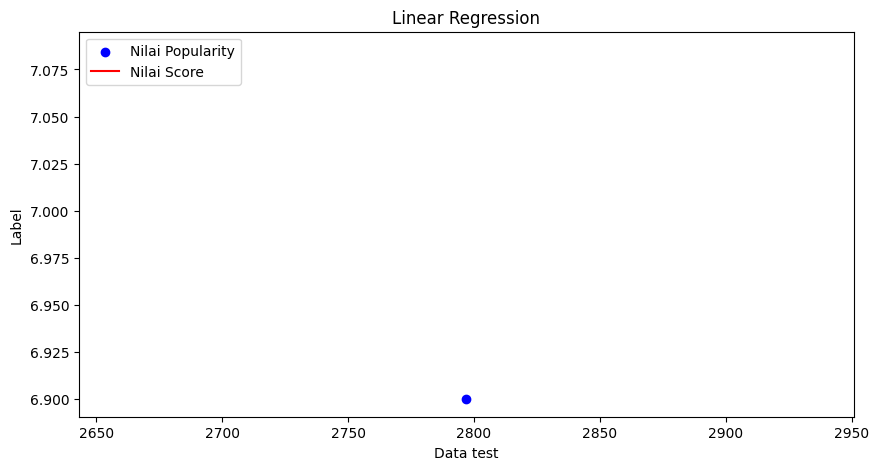

In [143]:
# Grafik Linear Regression
plt.figure(figsize=(10,5))
plt.scatter(data_test2, label_test2, color="blue",label="Nilai Popularity")
plt.plot(data_test2, predicting2, color="red",label="Nilai Score")
plt.title('Linear Regression')
plt.xlabel('Data test')
plt.ylabel('Label')
plt.legend(loc ='upper left')
plt.show()

In [144]:
# Perbandingan Skor algoritma

print(f'Skor Model KNN dengan k=5\t\t: {knn.score(data_test, label_test)}',
      f'Skor Model GaussianNB\t\t\t: {gnb.score(data_test, label_test)}',
      f'Skor Model Linear Regression\t\t: {reg.score(data_test2, label_test2)}',
      sep = '\n' + '-'*60 + '\n')

Skor Model KNN dengan k=5		: 0.0
------------------------------------------------------------
Skor Model GaussianNB			: 0.0
------------------------------------------------------------
Skor Model Linear Regression		: nan


In [145]:
# Tampaknya datanya terlalu bersih :D